그래디언트 부스트

In [6]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [7]:
matplotlib.rc('font',family = 'Malgun Gothic')
matplotlib.rc('axes', unicode_minus = False)

In [8]:
df_raw = pd.read_csv('/home/piai/바탕화면/2. Big Data 분석/HMEQ.csv')

In [9]:
import os
os.environ['PATH'] += os.pathsep + "/home/piai/anaconda3/pkgs/graphviz-2.50.0-h3cd0ef9_0/bin/"

In [10]:
df_raw['JOB'].fillna("Other",inplace = True)
df_raw.fillna(df_raw.mean(),inplace = True)

/tmp/ipykernel_2738/3804713323.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_raw.fillna(df_raw.mean(),inplace = True)


In [11]:
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_x = df_raw_dummy.drop('BAD', axis = 1, inplace = False)
df_raw_y = df_raw_dummy['BAD']

In [12]:
df_train_x, df_test_x, df_train_y, df_test_y =  train_test_split(df_raw_x, df_raw_y, test_size = 0.3, random_state = 1234)

In [13]:
gb_uncust = GradientBoostingClassifier(random_state = 1234)
gb_uncust.fit(df_train_x, df_train_y)

GradientBoostingClassifier(random_state=1234)

In [14]:
print('Accuracy on training set:', gb_uncust.score(df_train_x,df_train_y))
print('Accuracy on test set:', gb_uncust.score(df_test_x,df_test_y))

Accuracy on training set: 0.963400686237133
Accuracy on test set: 0.9413333333333334


In [15]:
#학습률 조정
train_accuracy = []
test_accuracy = []
para_lr = [lr * 0.1 for lr in range(1,10)]

for v_learning_rate in para_lr:
    gb = GradientBoostingClassifier(learning_rate = v_learning_rate)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

df_accuracy_lr = pd.DataFrame()
df_accuracy_lr['LearningRate'] = para_lr
df_accuracy_lr['TrainAccuracy'] = train_accuracy
df_accuracy_lr['TestAccuracy'] = test_accuracy

In [16]:
df_accuracy_lr.round(3)

,LearningRate,TrainAccuracy,TestAccuracy
0,0.1,0.963,0.940
1,0.2,0.984,0.940
2,0.3,0.994,0.940
3,0.4,0.998,0.932
4,0.5,1.000,0.935
5,0.6,0.996,0.940
6,0.7,1.000,0.943
7,0.8,0.999,0.931
8,0.9,1.000,0.936


findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


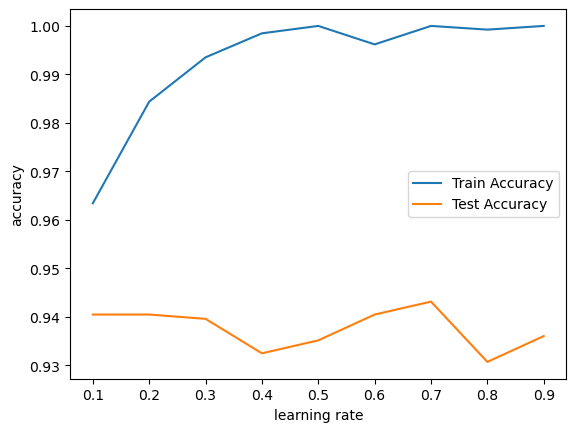

In [17]:
plt.plot(para_lr, train_accuracy, linestyle='-', label = 'Train Accuracy')
plt.plot(para_lr, test_accuracy, linestyle='-', label = 'Test Accuracy')
plt.ylabel('accuracy')
plt.xlabel('learning rate')
plt.legend()

학습률을 0.7로 조정

In [18]:
#트리 수 조정
train_accuracy = []
test_accuracy = []
para_n_tree = [n_tree * 10 for n_tree in range(1,16)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingClassifier(n_estimators = v_n_estimators,learning_rate = 0.7)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

df_accuracy_lr = pd.DataFrame()
df_accuracy_lr['Estimators'] = para_n_tree
df_accuracy_lr['TrainAccuracy'] = train_accuracy
df_accuracy_lr['TestAccuracy'] = test_accuracy
df_accuracy_lr.round(3)

,Estimators,TrainAccuracy,TestAccuracy
0,10,0.962,0.933
1,20,0.975,0.937
2,30,0.983,0.938
3,40,0.990,0.939
4,50,0.995,0.943
5,60,0.998,0.940
6,70,1.000,0.942
7,80,1.000,0.941
8,90,1.000,0.943
9,100,1.000,0.943


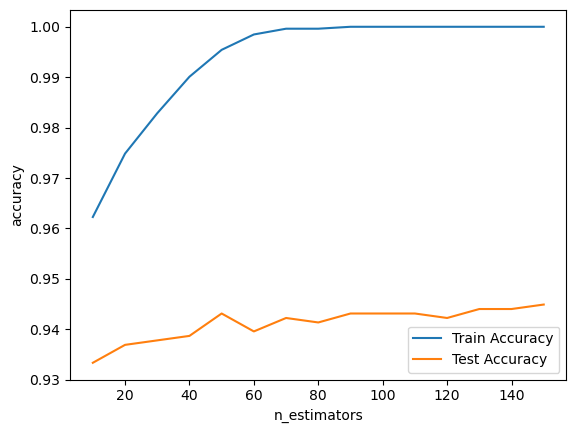

In [19]:
plt.plot(para_n_tree, train_accuracy, linestyle='-', label = 'Train Accuracy')
plt.plot(para_n_tree, test_accuracy, linestyle='-', label = 'Test Accuracy')
plt.ylabel('accuracy')
plt.xlabel('n_estimators')
plt.legend()

트리 수가 많을 수록 연산속도는 길어지지만 더 높은 정확도를 보일 것으로 예상하고 최대값인 70으로 사용

In [20]:
#최대 깊이 조정
train_accuracy = []
test_accuracy = []
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    gb = GradientBoostingClassifier(max_depth = v_max_depth,n_estimators = 70,learning_rate = 0.7)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

df_accuracy_lr = pd.DataFrame()
df_accuracy_lr['Depth'] = para_depth
df_accuracy_lr['TrainAccuracy'] = train_accuracy
df_accuracy_lr['TestAccuracy'] = test_accuracy
df_accuracy_lr.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.946,0.935
1,2,0.983,0.932
2,3,1.000,0.942
3,4,1.000,0.942
4,5,1.000,0.932
5,6,1.000,0.940
6,7,1.000,0.943
7,8,1.000,0.945
8,9,1.000,0.950
9,10,1.000,0.947


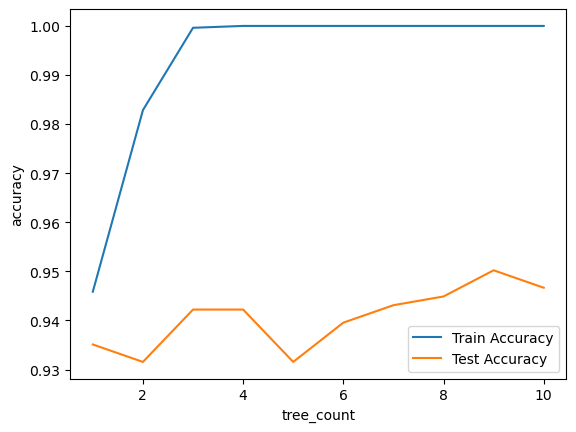

In [22]:
plt.plot(para_depth, train_accuracy, linestyle='-', label = 'Train Accuracy')
plt.plot(para_depth, test_accuracy, linestyle='-', label = 'Test Accuracy')
plt.ylabel('accuracy')
plt.xlabel('max_depth')
plt.legend()

In [23]:
#분리 노드의 최소 자료수
train_accuracy = []
test_accuracy = []
para_split = [n_split * 10 for n_split in range(2,11)]

for v_min_samples in para_split:
    gb = GradientBoostingClassifier(min_samples_split = v_min_samples,max_depth = 9,n_estimators = 70,learning_rate = 0.7, random_state = 1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

df_accuracy_lr = pd.DataFrame()
df_accuracy_lr['MinSamplesSplit'] = para_split
df_accuracy_lr['TrainAccuracy'] = train_accuracy
df_accuracy_lr['TestAccuracy'] = test_accuracy
df_accuracy_lr.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,20,1.0,0.947
1,30,1.0,0.945
2,40,1.0,0.948
3,50,1.0,0.948
4,60,1.0,0.942
5,70,1.0,0.944
6,80,1.0,0.942
7,90,1.0,0.943
8,100,1.0,0.941


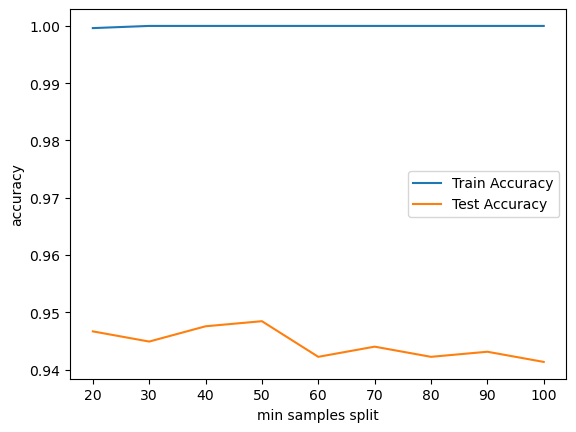

In [24]:
plt.plot(para_split, train_accuracy, linestyle='-', label = 'Train Accuracy')
plt.plot(para_split, test_accuracy, linestyle='-', label = 'Test Accuracy')
plt.ylabel('accuracy')
plt.xlabel('min samples split')
plt.legend()

In [25]:
#잎사귀 노드의 최소 자료 수 변경에 따른 모델
train_accuracy = []
test_accuracy = []
para_leaf = [n_leaf * 5 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingClassifier(min_samples_leaf = v_min_samples_leaf,max_depth = 9,n_estimators = 70,learning_rate = 0.7)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

df_accuracy_lr = pd.DataFrame()
df_accuracy_lr['MinSamplesLeaf'] = para_leaf
df_accuracy_lr['TrainAccuracy'] = train_accuracy
df_accuracy_lr['TestAccuracy'] = test_accuracy
df_accuracy_lr.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,5,1.0,0.952
1,10,1.0,0.952
2,15,1.0,0.949
3,20,1.0,0.952
4,25,1.0,0.948
5,30,1.0,0.950
6,35,1.0,0.948
7,40,1.0,0.949
8,45,1.0,0.949
9,50,1.0,0.953


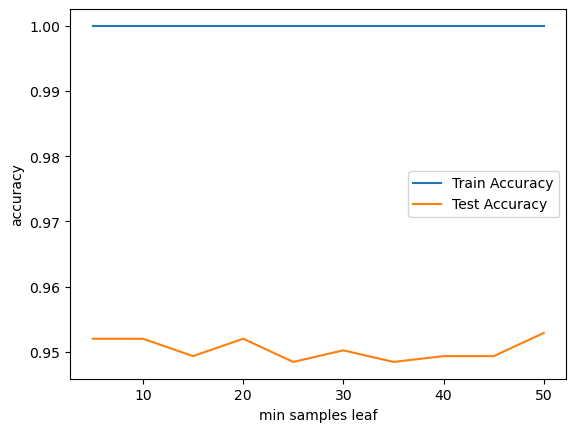

In [26]:
plt.plot(para_leaf, train_accuracy, linestyle='-', label = 'Train Accuracy')
plt.plot(para_leaf, test_accuracy, linestyle='-', label = 'Test Accuracy')
plt.ylabel('accuracy')
plt.xlabel('min samples leaf')
plt.legend()

In [27]:
gb_final = GradientBoostingClassifier(min_samples_leaf = 20,learning_rate = 0.7, max_depth = 9, n_estimators = 70)
gb_final.fit(df_train_x,df_train_y)
y_pred = gb_final.predict(df_test_x)
print('traing set 정확성:',gb_final.score(df_train_x,df_train_y))
print('testing set 정확성:',gb_final.score(df_test_x,df_test_y))
print('Confusion Matrix:\n',confusion_matrix(df_test_y,y_pred))
print('Confusion Matrix:\n',confusion_matrix(df_test_y,y_pred))

traing set 정확성: 1.0
testing set 정확성: 0.952
Confusion Matrix:
 [[1020    1]
 [  53   51]]
Confusion Matrix:
 [[1020    1]
 [  53   51]]


In [28]:
print(classification_report(df_test_y,y_pred,digits=3))

              precision    recall  f1-score   support

           0      0.951     0.999     0.974      1021
           1      0.981     0.490     0.654       104

    accuracy                          0.952      1125
   macro avg      0.966     0.745     0.814      1125
weighted avg      0.953     0.952     0.945      1125



recall 점수가 무척 낮게 나온다 이는 실제 1인 것중에 모델이 1이라고 예측하는 비율이 무척 낮은 것을 의미한다.
즉 실제로 0일 경우는 잘 맞추지만
1일 경우는 1이라고 예측하는 비율이 낮다
근데 여기서 목표 변수는 1로 

XGBoost

In [40]:
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score

In [41]:
def eval_class_model(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precesion = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    
    print('오차행렬 \n',confusion, '\n')
    print('정확도: ',accuracy)
    print('정밀도: ', precesion)
    print('재현율: ',recall)
    print('F1: ', F1)
    print('AUC: ', AUC)

In [42]:
xgboost_uncust = XGBClassifier()
xgboost_uncust

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [44]:
xgboost_uncust.fit(df_train_x, df_train_y)
print('모델 생성 및 평가(Train) \n')
xgb_pred_train = xgboost_uncust.predict(df_train_x)
eval_class_model(df_train_y,xgb_pred_train)
print('모델 생성 및 평가(Test) \n')
xgb_pred_test = xgboost_uncust.predict(df_test_x)
eval_class_model(df_test_y,xgb_pred_test)

모델 생성 및 평가(Train) 

오차행렬 
 [[2382    0]
 [   0  241]] 

정확도:  1.0
정밀도:  1.0
재현율:  1.0
F1:  1.0
AUC:  1.0
모델 생성 및 평가(Test) 

오차행렬 
 [[1019    2]
 [  58   46]] 

정확도:  0.9466666666666667
정밀도:  0.9583333333333334
재현율:  0.4423076923076923
F1:  0.6052631578947368
AUC:  0.7201744142243652


In [45]:
xgboost_user = XGBClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 5)
xgboost_user.fit(df_train_x, df_train_y)
xgb_pred_train = xgboost_user.predict(df_train_x)

print('사용자 모델 평가(Train) \n')
eval_class_model(df_train_y,xgb_pred_train)
print('\n', classification_report(df_train_y, xgb_pred_train))

xgb_pred_test = xgboost_user.predict(df_test_x)

print('사용자 모델 평가(Test) \n')
eval_class_model(df_test_y,xgb_pred_test)
print('\n', classification_report(df_test_y, xgb_pred_test))

사용자 모델 평가(Train) 

오차행렬 
 [[2382    0]
 [  49  192]] 

정확도:  0.98131910026687
정밀도:  1.0
재현율:  0.7966804979253111
F1:  0.8868360277136259
AUC:  0.8983402489626555

               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2382
           1       1.00      0.80      0.89       241

    accuracy                           0.98      2623
   macro avg       0.99      0.90      0.94      2623
weighted avg       0.98      0.98      0.98      2623

사용자 모델 평가(Test) 

오차행렬 
 [[1020    1]
 [  63   41]] 

정확도:  0.9431111111111111
정밀도:  0.9761904761904762
재현율:  0.3942307692307692
F1:  0.5616438356164383
AUC:  0.6966256686506441

               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1021
           1       0.98      0.39      0.56       104

    accuracy                           0.94      1125
   macro avg       0.96      0.70      0.77      1125
weighted avg       0.95      0.94      0.93      1125



In [46]:
#초기 중지 옵션 사용 모델 개발 및 평가
xgb_stop = XGBClassifier(n_estimators = 300, learning_rate =0.1, max_depth = 6)
eval_df = [(df_test_x, df_test_y)]
xgb_stop.fit(df_train_x, df_train_y, early_stopping_rounds = 150,
            eval_metric = 'logloss', eval_set = eval_df, verbose = True)

[0]	validation_0-logloss:0.62092
[1]	validation_0-logloss:0.56184
[2]	validation_0-logloss:0.51341
[3]	validation_0-logloss:0.47230
[4]	validation_0-logloss:0.43716
[5]	validation_0-logloss:0.40648
[6]	validation_0-logloss:0.38075
[7]	validation_0-logloss:0.35740
[8]	validation_0-logloss:0.33736
[9]	validation_0-logloss:0.32025
[10]	validation_0-logloss:0.30528
[11]	validation_0-logloss:0.29236
[12]	validation_0-logloss:0.28106
[13]	validation_0-logloss:0.27113
[14]	validation_0-logloss:0.26233
[15]	validation_0-logloss:0.25407
[16]	validation_0-logloss:0.24520
[17]	validation_0-logloss:0.23947
[18]	validation_0-logloss:0.23388
[19]	validation_0-logloss:0.22930
[20]	validation_0-logloss:0.22485
[21]	validation_0-logloss:0.22028
[22]	validation_0-logloss:0.21723
[23]	validation_0-logloss:0.21451
[24]	validation_0-logloss:0.21211
[25]	validation_0-logloss:0.20965
[26]	validation_0-logloss:0.20786
[27]	validation_0-logloss:0.20589
[28]	validation_0-logloss:0.20396
[29]	validation_0-loglos

/home/piai/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/piai/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[35]	validation_0-logloss:0.19800
[36]	validation_0-logloss:0.19692
[37]	validation_0-logloss:0.19629
[38]	validation_0-logloss:0.19585
[39]	validation_0-logloss:0.19575
[40]	validation_0-logloss:0.19473
[41]	validation_0-logloss:0.19445
[42]	validation_0-logloss:0.19447
[43]	validation_0-logloss:0.19413
[44]	validation_0-logloss:0.19427
[45]	validation_0-logloss:0.19340
[46]	validation_0-logloss:0.19326
[47]	validation_0-logloss:0.19208
[48]	validation_0-logloss:0.19208
[49]	validation_0-logloss:0.19181
[50]	validation_0-logloss:0.19102
[51]	validation_0-logloss:0.19055
[52]	validation_0-logloss:0.19050
[53]	validation_0-logloss:0.19086
[54]	validation_0-logloss:0.19073
[55]	validation_0-logloss:0.19130
[56]	validation_0-logloss:0.19120
[57]	validation_0-logloss:0.19116
[58]	validation_0-logloss:0.19089
[59]	validation_0-logloss:0.19063
[60]	validation_0-logloss:0.19077
[61]	validation_0-logloss:0.19067
[62]	validation_0-logloss:0.19030
[63]	validation_0-logloss:0.18936
[64]	validatio

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=300, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [47]:
xgb_pred_stop = xgb_stop.predict(df_test_x)
print('\n 조기 중단 모델 평가 \n')
eval_class_model(df_test_y, xgb_pred_stop)
print('\n', classification_report(df_test_y, xgb_pred_stop))


 조기 중단 모델 평가 

오차행렬 
 [[1020    1]
 [  62   42]] 

정확도:  0.944
정밀도:  0.9767441860465116
재현율:  0.40384615384615385
F1:  0.5714285714285714
AUC:  0.7014333609583364

               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1021
           1       0.98      0.40      0.57       104

    accuracy                           0.94      1125
   macro avg       0.96      0.70      0.77      1125
weighted avg       0.95      0.94      0.93      1125



In [48]:
from xgboost import plot_importance

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


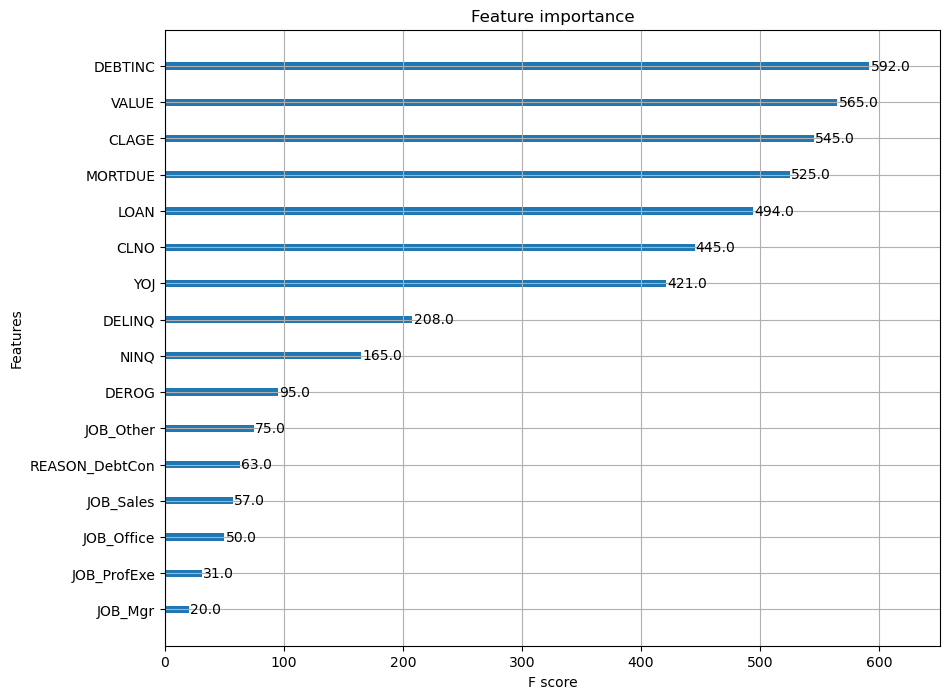

In [49]:
fig, ax = plt.subplots(figsize=(10,8))
plot_importance(xgb_stop, ax = ax)

서포트 벡터 머신 연습

In [43]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz
import graphviz

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [44]:
df_raw = pd.read_csv('/home/piai/바탕화면/2. Big Data 분석/HMEQ.csv')

import os
os.environ['PATH'] += os.pathsep + "/home/piai/anaconda3/pkgs/graphviz-2.50.0-h3cd0ef9_0/bin/"

df_raw['JOB'].fillna("Other",inplace = True)
df_raw.fillna(df_raw.mean(),inplace = True)

df_raw_dummy = pd.get_dummies(df_raw)
df_raw_x = df_raw_dummy.drop('BAD', axis = 1, inplace = False)
df_raw_y = df_raw_dummy['BAD']

df_train_x, df_test_x, df_train_y, df_test_y =  train_test_split(df_raw_x, df_raw_y, test_size = 0.3, random_state = 1234)

/tmp/ipykernel_2738/2269044471.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_raw.fillna(df_raw.mean(),inplace = True)


In [45]:
svm_uncust = SVC(random_state = 1234)
svm_uncust.fit(df_train_x, df_train_y)

SVC(random_state=1234)

In [46]:
print(svm_uncust.get_params().keys())
print(svm_uncust.get_params().values())

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])
dict_values([1.0, False, 200, None, 0.0, 'ovr', 3, 'scale', 'rbf', -1, False, 1234, True, 0.001, False])


In [47]:
#c의 변화에 따른 정확도 변화
#c: 이상치가 허용된 경우 완벽하게 분리할 수 없어 일정 수준의 오류를 허용하는 정도
train_accuracy = []
test_accuracy = []
para_c = [10**c for c in range(-2,3)]

for v_C in para_c:
    svm = SVC(C=v_C,random_state = 1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x,df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))

df_accuracy_c = pd.DataFrame()
df_accuracy_c['C'] = para_c
df_accuracy_c['TrainAccuracy'] = train_accuracy
df_accuracy_c['TestAccuracy'] = test_accuracy
df_accuracy_c.round(3)

,C,TrainAccuracy,TestAccuracy
0,0.01,0.908,0.908
1,0.10,0.908,0.908
2,1.00,0.908,0.908
3,10.00,0.909,0.908
4,100.00,0.909,0.909


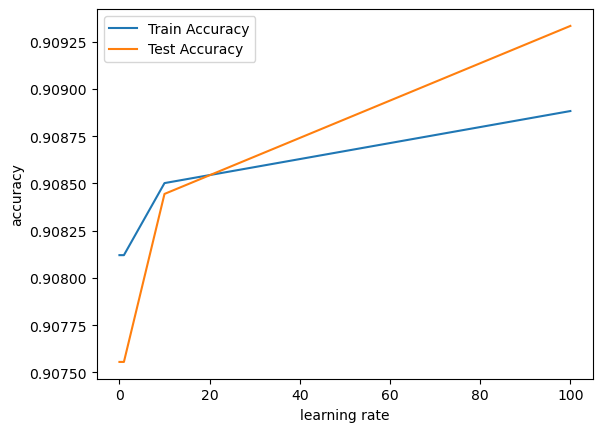

In [48]:
plt.plot(para_c, train_accuracy, linestyle='-', label = 'Train Accuracy')
plt.plot(para_c, test_accuracy, linestyle='-', label = 'Test Accuracy')
plt.ylabel('accuracy')
plt.xlabel('learning rate')
plt.legend()

standard scaler를 적용하지 않았기 때문에 train accuracy가 test accuracy보다 작게 나온다

In [32]:
train_accuracy = []
test_accuracy = []
para_gamma = [10**gamma for gamma in range(-2,2)]

for v_gamma in para_gamma:
    svm = SVC(gamma=v_gamma,random_state = 1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x,df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))

df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma['gamma'] = para_gamma
df_accuracy_gamma['TrainAccuracy'] = train_accuracy
df_accuracy_gamma['TestAccuracy'] = test_accuracy
df_accuracy_gamma.round(3)

,gamma,TrainAccuracy,TestAccuracy
0,0.01,1.0,0.908
1,0.10,1.0,0.908
2,1.00,1.0,0.908
3,10.00,1.0,0.908


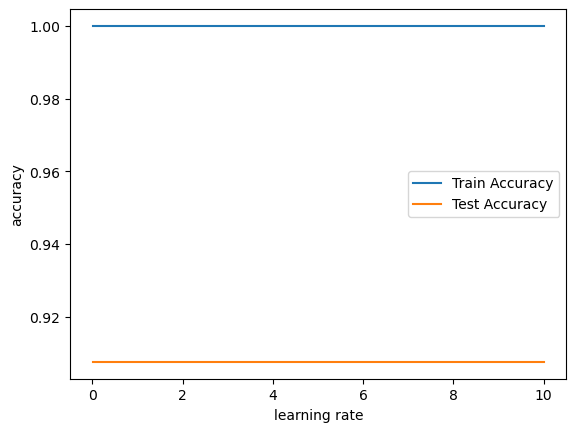

In [33]:
plt.plot(para_gamma, train_accuracy, linestyle='-', label = 'Train Accuracy')
plt.plot(para_gamma, test_accuracy, linestyle='-', label = 'Test Accuracy')
plt.ylabel('accuracy')
plt.xlabel('learning rate')
plt.legend()

SVM은 연속형 변수들 간의 마진을 바탕으로 분류를 실행하기 때문에 데이터 단위의 영향이 크다
그렇기 때문에 사전에 이를 표준화하는 작업이 필요하다

In [49]:
v_feature_name=df_train_x.columns
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df_raw_x)
df_scaled=pd.DataFrame(df_scaled,columns=v_feature_name)
df_scaled.head()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,-1.559587,-0.993626,-1.224910,-0.017563,-0.267462,-0.342558,-0.967342,-0.018776,-1.428350,0.356347,-1.548549,1.548549,-0.381873,-0.446497,1.207355,-0.574064,-0.131804,-0.189556
1,-1.550817,-1.039240,-1.174897,0.251809,-0.267462,-0.342558,-1.122053,-0.666629,-1.428350,0.329025,-1.548549,1.548549,-0.381873,-0.446497,1.207355,-0.574064,-0.131804,-0.189556
2,-1.506968,0.607570,0.260973,-0.960364,-0.267462,-0.342558,-1.094930,-0.666629,-0.905133,-0.303684,-1.548549,1.548549,-0.381873,2.239654,-0.828257,-0.574064,-0.131804,-0.189556
3,-1.498198,-0.897428,-1.093133,0.386495,-0.267462,-0.342558,-1.344679,-0.018776,-0.067985,0.493725,-1.548549,1.548549,2.618672,-0.446497,-0.828257,-0.574064,-0.131804,-0.189556
4,-1.498198,0.520156,0.191721,-0.690992,-0.267462,-0.342558,-1.060586,-0.666629,-0.905133,-0.531456,-1.548549,1.548549,-0.381873,2.239654,-0.828257,-0.574064,-0.131804,-0.189556


In [50]:
df_scaled_train_x,df_scaled_test_x=train_test_split(df_scaled,test_size=0.3)
print('train data X size : {}'.format(df_scaled_train_x.shape))
print('test data X size : {}'.format(df_scaled_test_x.shape))

train data X size : (2623, 18)
test data X size : (1125, 18)


In [51]:
svm_scaled=SVC()
svm_scaled.fit(df_scaled_train_x,df_train_y)
print('Accuracy on training set : {:.3f}'.format(svm_scaled.score(df_scaled_train_x,df_train_y)))
print('Accuracy on test set : {:.3f}'.format(svm_scaled.score(df_scaled_test_x,df_test_y)))

Accuracy on training set : 0.908
Accuracy on test set : 0.908


In [54]:
train_accuracy = []
test_accuracy = []
para_c = [c*0.1 for c in range(1,21)]

for v_C in para_c:
    svm = SVC(C=v_C)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x,df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_test_y))

df_accuracy_c = pd.DataFrame()
df_accuracy_c['C'] = para_c
df_accuracy_c['TrainAccuracy'] = train_accuracy
df_accuracy_c['TestAccuracy'] = test_accuracy
df_accuracy_c.round(3)

,C,TrainAccuracy,TestAccuracy
0,0.1,0.908,0.908
1,0.2,0.908,0.908
2,0.3,0.908,0.908
3,0.4,0.908,0.908
4,0.5,0.908,0.908
5,0.6,0.908,0.908
6,0.7,0.908,0.908
7,0.8,0.908,0.908
8,0.9,0.908,0.908
9,1.0,0.908,0.908


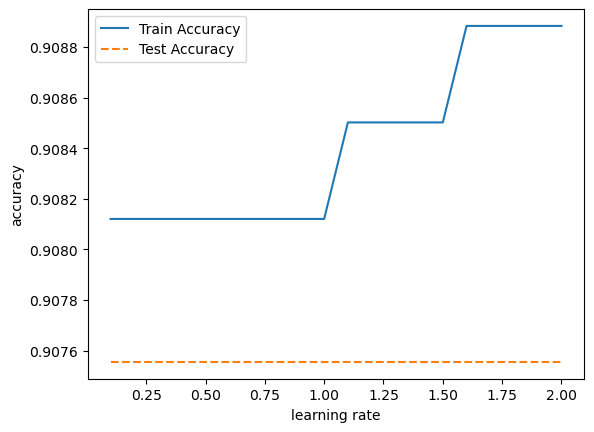

In [56]:
plt.plot(para_c, train_accuracy, linestyle='-', label = 'Train Accuracy')
plt.plot(para_c, test_accuracy, linestyle='--', label = 'Test Accuracy')
plt.ylabel('accuracy')
plt.xlabel('learning rate')
plt.legend()

이전 분석에서 학습율을 올리니까 과적합되어 recall이 낮게 나오는 경우를 확인했다. 그렇기 때문에 가장 train_accuracy가 증가하는 1.3으로 선택한다

In [57]:
train_accuracy = []
test_accuracy = []
para_gamma = [0.05*gamma for gamma in range(1,15)]

for v_gamma in para_gamma:
    svm = SVC(gamma=v_gamma,C=1.3)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x,df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_test_y))

df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma['gamma'] = para_gamma
df_accuracy_gamma['TrainAccuracy'] = train_accuracy
df_accuracy_gamma['TestAccuracy'] = test_accuracy
df_accuracy_gamma.round(3)

,gamma,TrainAccuracy,TestAccuracy
0,0.05,0.909,0.908
1,0.10,0.910,0.907
2,0.15,0.910,0.906
3,0.20,0.911,0.906
4,0.25,0.912,0.906
5,0.30,0.915,0.906
6,0.35,0.915,0.905
7,0.40,0.915,0.905
8,0.45,0.916,0.905
9,0.50,0.917,0.905


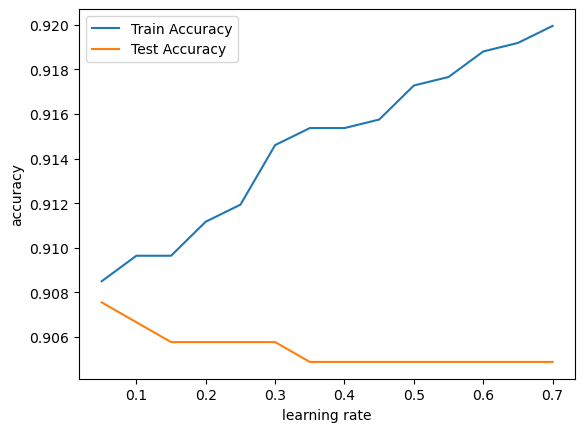

In [58]:
plt.plot(para_gamma, train_accuracy, linestyle='-', label = 'Train Accuracy')
plt.plot(para_gamma, test_accuracy, linestyle='-', label = 'Test Accuracy')
plt.ylabel('accuracy')
plt.xlabel('learning rate')
plt.legend()

test_accuracy가 가장 높아지는 0.1을 gamma값으로 사용

In [59]:
svc_final=SVC(gamma=0.1,C=1.3)
svc_final.fit(df_scaled_train_x,df_train_y)
y_pred=svc_final.predict(df_scaled_test_x)

print('Accuracy on training set : {:.3f}'.format(svc_final.score(df_scaled_train_x,df_train_y)))
print('Accuracy on test set : {:.3f}'.format(svc_final.score(df_scaled_test_x,df_test_y)))
print('Confusion matrix : \n{}'.format(confusion_matrix(df_test_y,y_pred)))
print(classification_report(df_test_y,y_pred,digits=3))

Accuracy on training set : 0.910
Accuracy on test set : 0.907
Confusion matrix : 
[[1020    1]
 [ 104    0]]
              precision    recall  f1-score   support

           0      0.907     0.999     0.951      1021
           1      0.000     0.000     0.000       104

    accuracy                          0.907      1125
   macro avg      0.454     0.500     0.476      1125
weighted avg      0.824     0.907     0.863      1125



인공신경망

In [60]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [61]:
import matplotlib    
import matplotlib.font_manager

[f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]
 # ['NanumBarunGothic',
 # 'NanumMyeongjo',
 # 'NanumMyeongjo',
 # 'NanumGothic',
 # 'NanumBarunGothic',
 # 'NanumGothic']

import warnings
warnings.filterwarnings(action = 'ignore')

import matplotlib as mpl

# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'
%matplotlib inline

In [62]:
df_raw = pd.read_csv('/home/piai/바탕화면/2. Big Data 분석/HMEQ.csv')

In [63]:
df_raw.isnull().sum()

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [64]:
df_raw.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,3748.000000,3748.000000,3748.000000,3734.000000,3543.000000,3748.000000,3718.000000,3711.000000,3692.000000,3748.000000,3748.000000
mean,0.092049,19483.564568,75117.309232,106791.045795,9.130398,0.161153,0.269769,180.873315,1.028982,21.649680,34.130636
std,0.289134,11404.260479,44861.197182,54374.991076,7.637535,0.602606,0.790790,82.507487,1.555433,9.557532,8.372096
min,0.000000,1700.000000,4641.000000,21144.000000,0.000000,0.000000,0.000000,0.486711,0.000000,0.000000,0.838118
25%,0.000000,12000.000000,47843.000000,70238.000000,3.000000,0.000000,0.000000,118.625765,0.000000,15.000000,29.397564
50%,0.000000,17100.000000,66581.000000,93676.500000,7.000000,0.000000,0.000000,177.085845,0.000000,21.000000,35.024732
75%,0.000000,23900.000000,92353.750000,122423.750000,14.000000,0.000000,0.000000,230.272746,2.000000,26.000000,39.147195
max,1.000000,89900.000000,399412.000000,512650.000000,41.000000,10.000000,10.000000,1168.233561,13.000000,71.000000,203.312149


<AxesSubplot:>

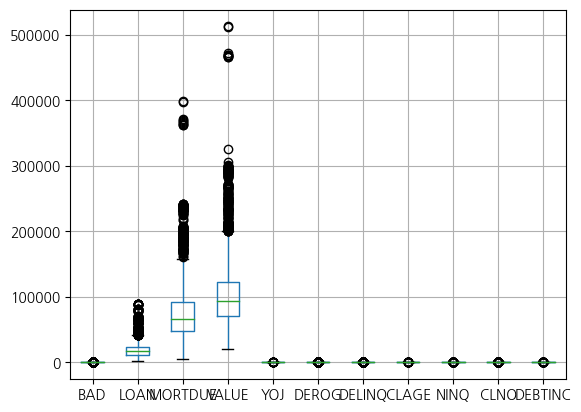

In [65]:
df_raw.boxplot()

In [66]:
df_raw['JOB'].fillna("Other",inplace = True)

df_raw.fillna(df_raw.mean(),inplace = True)

In [67]:
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_x = df_raw_dummy.drop('BAD', axis = 1, inplace = False)
df_raw_y = df_raw_dummy['BAD']

In [68]:
df_train_x, df_test_x, df_train_y, df_test_y =  train_test_split(df_raw_x, df_raw_y, test_size = 0.3, random_state = 1234)

In [69]:
nn_uncustomized = MLPClassifier(random_state = 1234)
nn_uncustomized.fit(df_train_x,df_train_y)
print('Accuracy on training set:', nn_uncustomized.score(df_train_x,df_train_y))
print('Accuracy on test set:', nn_uncustomized.score(df_test_x,df_test_y))

Accuracy on training set: 0.7224552039649257
Accuracy on test set: 0.6826666666666666


In [70]:
print(nn_uncustomized.get_params().keys())
print(nn_uncustomized.get_params().values())

dict_keys(['activation', 'alpha', 'batch_size', 'beta_1', 'beta_2', 'early_stopping', 'epsilon', 'hidden_layer_sizes', 'learning_rate', 'learning_rate_init', 'max_fun', 'max_iter', 'momentum', 'n_iter_no_change', 'nesterovs_momentum', 'power_t', 'random_state', 'shuffle', 'solver', 'tol', 'validation_fraction', 'verbose', 'warm_start'])
dict_values(['relu', 0.0001, 'auto', 0.9, 0.999, False, 1e-08, (100,), 'constant', 0.001, 15000, 200, 0.9, 10, True, 0.5, 1234, True, 'adam', 0.0001, 0.1, False, False])


In [72]:

train_accuracy = []
test_accuracy = []
para_hidden = [5 * hidden for hidden in range(1,21)]

for v_hidden in para_hidden:
    nn = MLPClassifier(hidden_layer_sizes = (v_hidden, v_hidden), random_state = 1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x,df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))

df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden['LearningRate'] = para_hidden
df_accuracy_hidden['TrainAccuracy'] = train_accuracy
df_accuracy_hidden['TestAccuracy'] = test_accuracy
df_accuracy_hidden.round(3)

,LearningRate,TrainAccuracy,TestAccuracy
0,5,0.908,0.908
1,10,0.840,0.830
2,15,0.909,0.908
3,20,0.219,0.226
4,25,0.830,0.822
5,30,0.903,0.903
6,35,0.907,0.902
7,40,0.850,0.841
8,45,0.907,0.908
9,50,0.910,0.909


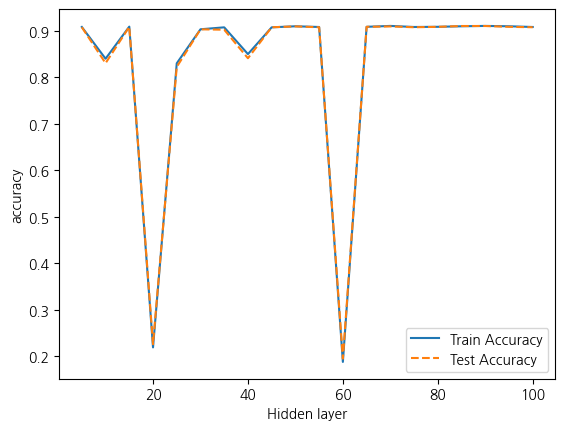

In [73]:
plt.plot(para_hidden, train_accuracy, linestyle='-', label = 'Train Accuracy')
plt.plot(para_hidden, test_accuracy, linestyle='--', label = 'Test Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Hidden layer')
plt.legend()

In [74]:
train_accuracy = []
test_accuracy = []

para_function = ["logistic", "tanh", "relu"]

for v_function in para_function:
    nn = MLPClassifier(activation = v_function, random_state = 1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x,df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))

df_accuracy_function = pd.DataFrame()
df_accuracy_function['ActivationFunction'] = para_function
df_accuracy_function['TrainAccuracy'] = train_accuracy
df_accuracy_function['TestAccuracy'] = test_accuracy
df_accuracy_function.round(3)

,ActivationFunction,TrainAccuracy,TestAccuracy
0,logistic,0.908,0.908
1,tanh,0.908,0.908
2,relu,0.722,0.683


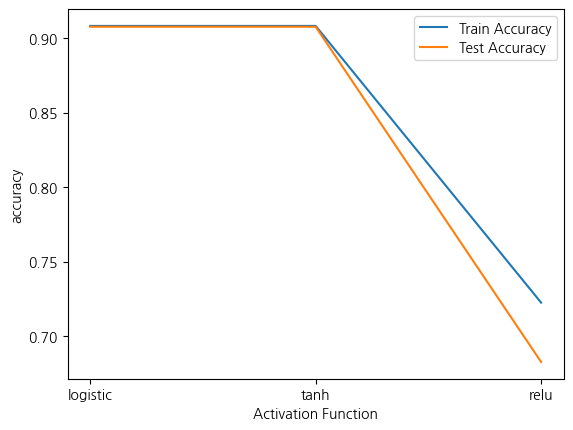

In [75]:
plt.plot(para_function, train_accuracy, linestyle='-', label = 'Train Accuracy')
plt.plot(para_function, test_accuracy, linestyle='-', label = 'Test Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Activation Function')
plt.legend()

표준화를 실시하지 않았기 때문에 단위가 큰 특정 변수가 상대적으로 큰 가중치를 갖게되고 이는 곧 과대적합이 된다

In [76]:
v_feature_name = df_train_x.columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns = v_feature_name)
df_scaled.head()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,-1.559587,-0.993626,-1.224910,-0.017563,-0.267462,-0.342558,-0.967342,-0.018776,-1.428350,0.356347,-1.548549,1.548549,-0.381873,-0.446497,1.207355,-0.574064,-0.131804,-0.189556
1,-1.550817,-1.039240,-1.174897,0.251809,-0.267462,-0.342558,-1.122053,-0.666629,-1.428350,0.329025,-1.548549,1.548549,-0.381873,-0.446497,1.207355,-0.574064,-0.131804,-0.189556
2,-1.506968,0.607570,0.260973,-0.960364,-0.267462,-0.342558,-1.094930,-0.666629,-0.905133,-0.303684,-1.548549,1.548549,-0.381873,2.239654,-0.828257,-0.574064,-0.131804,-0.189556
3,-1.498198,-0.897428,-1.093133,0.386495,-0.267462,-0.342558,-1.344679,-0.018776,-0.067985,0.493725,-1.548549,1.548549,2.618672,-0.446497,-0.828257,-0.574064,-0.131804,-0.189556
4,-1.498198,0.520156,0.191721,-0.690992,-0.267462,-0.342558,-1.060586,-0.666629,-0.905133,-0.531456,-1.548549,1.548549,-0.381873,2.239654,-0.828257,-0.574064,-0.131804,-0.189556


In [77]:
df_scaled_train_x, df_scaled_test_x=  train_test_split(df_scaled, test_size = 0.3, random_state = 1234)

print("train data x size:{}".format(df_scaled_train_x.shape))
print("test data x size:{}".format(df_scaled_test_x.shape))

train data x size:(2623, 18)
test data x size:(1125, 18)


In [78]:
nn_uncustomized = MLPClassifier(random_state = 1234)
nn_uncustomized.fit(df_scaled_train_x,df_train_y)
print('Accuracy on training set:', nn_uncustomized.score(df_scaled_train_x,df_train_y))
print('Accuracy on test set:', nn_uncustomized.score(df_scaled_test_x,df_test_y))

Accuracy on training set: 0.9714067861227602
Accuracy on test set: 0.9431111111111111


In [91]:
#은닉층의 개수에 따른 최적 정확도 찾기
#은닉층이 복잡할 수록 모델의 과대적합 경향성이 나타난다 그러나 모델의 정확도도 증가한다
#para_hidden은 은닉층 개수와 층별 노드의 개수를 의미한다
train_accuracy = []
test_accuracy = []
para_hidden = [5 * hidden for hidden in range(1,21)]

for v_hidden in para_hidden:
    nn = MLPClassifier(hidden_layer_sizes = (v_hidden, v_hidden))
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x,df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))

df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden['LearningRate'] = para_hidden
df_accuracy_hidden['TrainAccuracy'] = train_accuracy
df_accuracy_hidden['TestAccuracy'] = test_accuracy
df_accuracy_hidden.round(3)

,LearningRate,TrainAccuracy,TestAccuracy
0,5,0.939,0.928
1,10,0.945,0.933
2,15,0.966,0.940
3,20,0.978,0.948
4,25,0.978,0.948
5,30,0.985,0.948
6,35,0.990,0.957
7,40,0.991,0.948
8,45,0.994,0.951
9,50,0.997,0.954


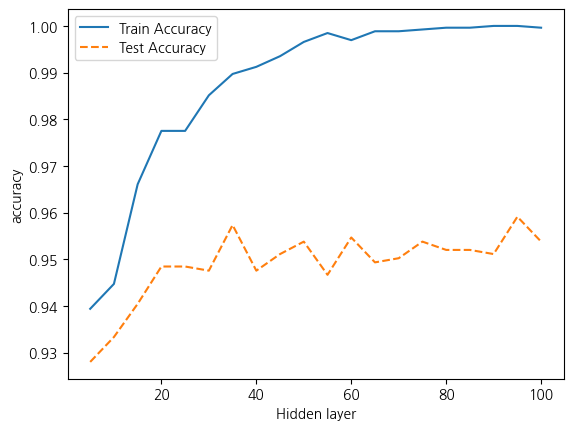

In [92]:
plt.plot(para_hidden, train_accuracy, linestyle='-', label = 'Train Accuracy')
plt.plot(para_hidden, test_accuracy, linestyle='--', label = 'Test Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Hidden layer')
plt.legend()

test_accuracy가 가장 높은 시점은 은닉층이 95일 때이지만 80이후로 학습데이터의 과대적합이 나타나기 때문에 이를 은닉층을 80으로 하는 것이 최적값이다

In [95]:
#활성화 함수는 입력층 또는 이전 은닉층의 정보를 다음 층으로의 출력하는 활성화 방식을 지정한다
#활성화 방식에 따라 이전 값의 출력 또는 소멸등이 결정되며, 자료 특성에 영향을 많이 받는다
train_accuracy = []
test_accuracy = []

para_function = ["logistic", "tanh", "relu"]

for v_function in para_function:
    nn = MLPClassifier(activation = v_function, hidden_layer_sizes = (80,80))
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x,df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))

df_accuracy_function = pd.DataFrame()
df_accuracy_function['ActivationFunction'] = para_function
df_accuracy_function['TrainAccuracy'] = train_accuracy
df_accuracy_function['TestAccuracy'] = test_accuracy
df_accuracy_function.round(3)

,ActivationFunction,TrainAccuracy,TestAccuracy
0,logistic,0.936,0.927
1,tanh,0.997,0.953
2,relu,0.999,0.951


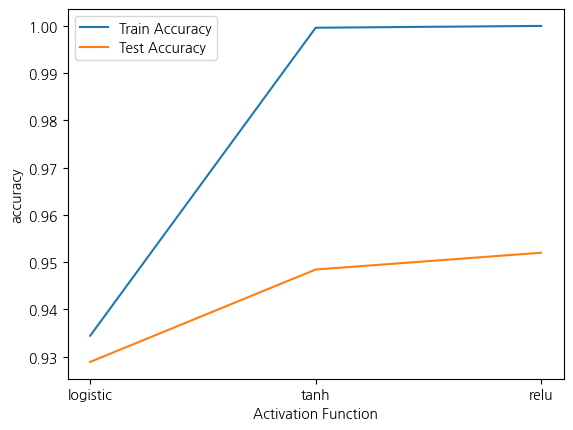

In [94]:
plt.plot(para_function, train_accuracy, linestyle='-', label = 'Train Accuracy')
plt.plot(para_function, test_accuracy, linestyle='-', label = 'Test Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Activation Function')
plt.legend()

이전의 다른 파라미터들과 달리 범주형 파라미터를 비교하기 때문에 단순히 정확도만을 비교해서 가장 높은 정확도를 갖는 relu 함수를 사용한다

In [96]:
activation = 'relu'

In [97]:
#가중치 최적화 변경에 따른 정확도를 비교한다
#신경망 모델의 학습 결과에 따른 손실함수 값을 최소화할 수 있는 하이퍼 파라미터를 지정해야한다
#L-BFGS: 제한된 메모리를 사용해서 특정 경계 내 최적화
#SGD: 확률적 경사하강 법을 통해 손실함수 기울기 미분과 학습률을 고려해 가중치를 결정
#ADAM: 우수한 성능을 갖는 solver로 Momentum과 AdaGrad를 결합했다
train_accuracy = []
test_accuracy = []

para_solver = ["lbfgs", "sgd", "adam"]

for v_solver in para_solver:
    nn = MLPClassifier(solver = v_solver,activation = "relu", hidden_layer_sizes = (80,80))
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x,df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))

df_accuracy_solver = pd.DataFrame()
df_accuracy_solver['solver'] = para_solver
df_accuracy_solver['TrainAccuracy'] = train_accuracy
df_accuracy_solver['TestAccuracy'] = test_accuracy
df_accuracy_solver.round(3)

,solver,TrainAccuracy,TestAccuracy
0,lbfgs,1.000,0.941
1,sgd,0.934,0.926
2,adam,1.000,0.950


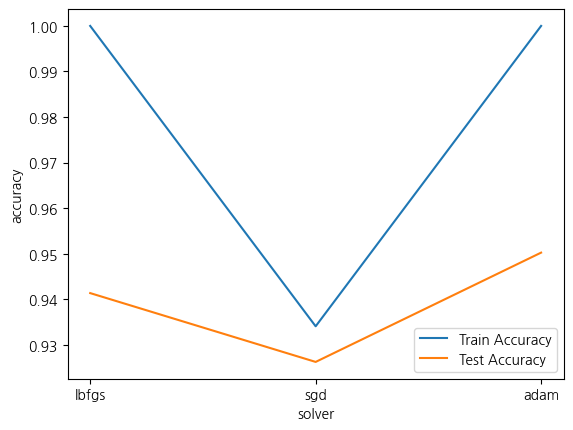

In [98]:
plt.plot(para_solver, train_accuracy, linestyle='-', label = 'Train Accuracy')
plt.plot(para_solver, test_accuracy, linestyle='-', label = 'Test Accuracy')
plt.ylabel('accuracy')
plt.xlabel('solver')
plt.legend()

adam과 lbfgs 모두 높은 정확도를 갖는데 이중 lbfgs를 사용해 성능을 확인한다

In [100]:
solver = "lbfgs"
#미니배치에 따른 모델 성능을 비교한다
#미니배치는 전체 학습 데이터를 어느 정도의 크기로 분리해서 어떻게 학습할지를 결정한다
#미내배치의 크기가 증가할 수록 train은 과적합 되지만 test의 오차는 증가하는 경향이 있다
train_accuracy = []
test_accuracy = []

para_batch = [20 * batch for batch in range(1,10)]

print(para_batch)

for v_batch in para_batch:
    nn = MLPClassifier(batch_size = v_batch, solver = "lbfgs",
                       activation = "relu", hidden_layer_sizes = (80,80))
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x,df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))

df_accuracy_batch = pd.DataFrame()
df_accuracy_batch['Mini Batch'] = para_batch
df_accuracy_batch['TrainAccuracy'] = train_accuracy
df_accuracy_batch['TestAccuracy'] = test_accuracy
df_accuracy_batch.round(3)

[20, 40, 60, 80, 100, 120, 140, 160, 180]


,Mini Batch,TrainAccuracy,TestAccuracy
0,20,1.0,0.947
1,40,1.0,0.955
2,60,1.0,0.950
3,80,1.0,0.945
4,100,1.0,0.951
5,120,1.0,0.952
6,140,1.0,0.955
7,160,1.0,0.955
8,180,1.0,0.951


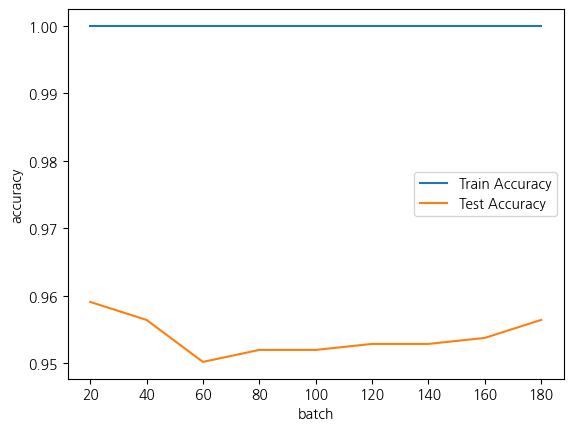

In [88]:
plt.plot(para_batch, train_accuracy, linestyle='-', label = 'Train Accuracy')
plt.plot(para_batch, test_accuracy, linestyle='-', label = 'Test Accuracy')
plt.ylabel('accuracy')
plt.xlabel('batch')
plt.legend()

In [104]:
nn_final = MLPClassifier(batch_size = 120, solver = "lbfgs", activation = "relu", hidden_layer_sizes = (80,80))
nn_final.fit(df_scaled_train_x, df_train_y)
y_pred = nn_final.predict(df_scaled_test_x)
print('traing set 정확성:',nn_final.score(df_scaled_train_x,df_train_y))
print('testing set 정확성:',nn_final.score(df_scaled_test_x,df_test_y))
print('Confusion Matrix:\n',confusion_matrix(df_test_y,y_pred))
print('Confusion Matrix:\n',confusion_matrix(df_test_y,y_pred))

traing set 정확성: 1.0
testing set 정확성: 0.9528888888888889
Confusion Matrix:
 [[1011   10]
 [  43   61]]
Confusion Matrix:
 [[1011   10]
 [  43   61]]


KNN

In [119]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
#분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [106]:
df_raw=pd.read_csv('/home/piai/바탕화면/2. Big Data 분석/HMEQ.csv',encoding="euc-kr")

In [107]:
#결측치 확인  -> 없음 ~!!
df_raw.isnull().sum(axis=0)

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [108]:
#결측치 처리
df_raw["JOB"].fillna("Other",inplace=True)
df_raw.fillna(df_raw.mean(),inplace=True)

In [109]:
#데이터 구성 더미 변수 생성
df_raw_dummy=pd.get_dummies(df_raw)
df_raw_dummy

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3743,0,88900,57264,90185.0,16.0,0,0.0,221.808718,0.0,16,36.112347,1,0,0,0,1,0,0,0
3744,0,89000,54576,92937.0,16.0,0,0.0,208.692070,0.0,15,35.859971,1,0,0,0,1,0,0,0
3745,0,89200,54045,92924.0,15.0,0,0.0,212.279697,0.0,15,35.556590,1,0,0,0,1,0,0,0
3746,0,89800,50370,91861.0,14.0,0,0.0,213.892709,0.0,16,34.340882,1,0,0,0,1,0,0,0


In [110]:

df_raw_x = df_raw_dummy.drop('BAD', axis = 1, inplace = False)
df_raw_y = df_raw_dummy['BAD']

df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_raw_x,df_raw_y,test_size=0.3,random_state = 1234) 
print("분할전 설명 변수 데이터 :",df_raw_x.shape)
print("분할 후 설명 변수 데이터:Train",df_train_x.shape,"test",df_test_x.shape)   

분할전 설명 변수 데이터 : (3748, 18)
분할 후 설명 변수 데이터:Train (2623, 18) test (1125, 18)


In [111]:
#모델 생성
knn_uncustomized=KNeighborsClassifier()
knn_uncustomized.fit(df_train_x,df_train_y)

print("Accuracy on training set :{:.3f}".format(knn_uncustomized.score(df_train_x,df_train_y)))
print("Accuracy on test set :{:.3f}".format(knn_uncustomized.score(df_test_x,df_test_y)))

Accuracy on training set :0.916
Accuracy on test set :0.908


In [112]:
print(knn_uncustomized.get_params().keys())
print(knn_uncustomized.get_params().values())

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])
dict_values(['auto', 30, 'minkowski', None, None, 5, 2, 'uniform'])


In [113]:
#학습률 조정
train_accuracy = []; test_accuracy = []
para_n_neighbors = [i for i in range(1,16)]

for v_n_neighbors in para_n_neighbors:
    knn = KNeighborsClassifier(n_neighbors= v_n_neighbors)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x,df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))

df_accuracy_neighbors = pd.DataFrame()
df_accuracy_neighbors['Neighbors'] = para_n_neighbors
df_accuracy_neighbors['TrainAccuracy'] = train_accuracy
df_accuracy_neighbors['TestAccuracy'] = test_accuracy
df_accuracy_neighbors.round(3)

,Neighbors,TrainAccuracy,TestAccuracy
0,1,1.000,0.877
1,2,0.928,0.912
2,3,0.929,0.913
3,4,0.916,0.914
4,5,0.916,0.908
5,6,0.913,0.911
6,7,0.913,0.912
7,8,0.910,0.912
8,9,0.911,0.913
9,10,0.909,0.910


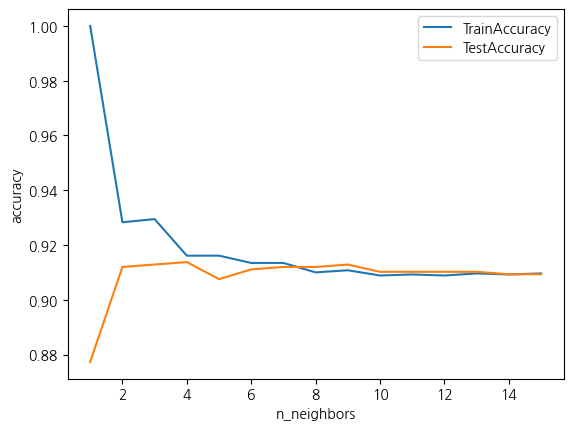

In [114]:
plt.plot(para_n_neighbors, train_accuracy, linestyle='-', label = 'TrainAccuracy')
plt.plot(para_n_neighbors, test_accuracy, linestyle='-', label = 'TestAccuracy')
plt.ylabel('accuracy')
plt.xlabel('n_neighbors')
plt.legend()

In [115]:
n_neighbors=4
train_accuracy = []; test_accuracy = []
para_n_neighbors = [i for i in range(1,11)]*2
para_weights=(["uniform"])*10+(["distance"]*10)

for (v_n_neighbors,v_weights) in zip(para_n_neighbors,para_weights):
    knn = KNeighborsClassifier(n_neighbors= v_n_neighbors,weights=v_weights)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x,df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))

df_accuracy_weights = pd.DataFrame()
df_accuracy_weights['Neighbors'] = para_n_neighbors
df_accuracy_weights['Weights'] = para_weights

df_accuracy_weights['TrainAccuracy'] = train_accuracy
df_accuracy_weights['TestAccuracy'] = test_accuracy
df_accuracy_weights.round(3)

,Neighbors,Weights,TrainAccuracy,TestAccuracy
0,1,uniform,1.000,0.877
1,2,uniform,0.928,0.912
2,3,uniform,0.929,0.913
3,4,uniform,0.916,0.914
4,5,uniform,0.916,0.908
5,6,uniform,0.913,0.911
6,7,uniform,0.913,0.912
7,8,uniform,0.910,0.912
8,9,uniform,0.911,0.913
9,10,uniform,0.909,0.910


In [116]:
df_accuracy_weights_pivot=df_accuracy_weights.pivot(index="Neighbors",columns="Weights",
                                                   values=["TrainAccuracy","TestAccuracy"])
df_accuracy_weights_pivot

TrainAccuracy           TestAccuracy          
Weights        distance   uniform     distance   uniform
Neighbors                                               
1                   1.0  1.000000     0.877333  0.877333
2                   1.0  0.928326     0.877333  0.912000
3                   1.0  0.929470     0.912000  0.912889
4                   1.0  0.916127     0.913778  0.913778
5                   1.0  0.916127     0.912889  0.907556
6                   1.0  0.913458     0.912889  0.911111
7                   1.0  0.913458     0.912889  0.912000
8                   1.0  0.910027     0.913778  0.912000
9                   1.0  0.910789     0.914667  0.912889
10                  1.0  0.908883     0.914667  0.910222

In [117]:
level0=df_accuracy_weights_pivot.columns.get_level_values(0)
level1=df_accuracy_weights_pivot.columns.get_level_values(1)
df_accuracy_weights_pivot.columns=level0+"_"+level1
df_accuracy_weights_pivot

,TrainAccuracy_distance,TrainAccuracy_uniform,TestAccuracy_distance,TestAccuracy_uniform
Neighbors,,,,
1,1.0,1.000000,0.877333,0.877333
2,1.0,0.928326,0.877333,0.912000
3,1.0,0.929470,0.912000,0.912889
4,1.0,0.916127,0.913778,0.913778
5,1.0,0.916127,0.912889,0.907556
6,1.0,0.913458,0.912889,0.911111
7,1.0,0.913458,0.912889,0.912000
8,1.0,0.910027,0.913778,0.912000
9,1.0,0.910789,0.914667,0.912889


<AxesSubplot:xlabel='Neighbors'>

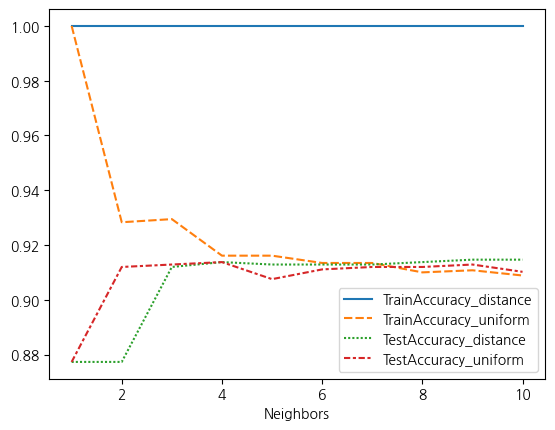

In [120]:
sns.lineplot(data=df_accuracy_weights_pivot)

In [121]:
train_accuracy = []; test_accuracy = []
para_n_neighbors = [i for i in range(1,11)]*2
para_metric=["euclidean"]*10+["manhattan"]*10

for (v_n_neighbors,v_metric) in zip(para_n_neighbors,para_metric):
    knn = KNeighborsClassifier(n_neighbors= v_n_neighbors,metric=v_metric,weights="uniform")
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x,df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))

df_accuracy_metric = pd.DataFrame()
df_accuracy_metric['Neighbors'] = para_n_neighbors
df_accuracy_metric['Metric'] = para_metric

df_accuracy_metric['TrainAccuracy'] = train_accuracy
df_accuracy_metric['TestAccuracy'] = test_accuracy
df_accuracy_metric.round(3)

,Neighbors,Metric,TrainAccuracy,TestAccuracy
0,1,euclidean,1.000,0.877
1,2,euclidean,0.928,0.912
2,3,euclidean,0.929,0.913
3,4,euclidean,0.916,0.914
4,5,euclidean,0.916,0.908
5,6,euclidean,0.913,0.911
6,7,euclidean,0.913,0.912
7,8,euclidean,0.910,0.912
8,9,euclidean,0.911,0.913
9,10,euclidean,0.909,0.910


In [122]:
df_accuracy_metric_pivot=df_accuracy_metric.pivot(index="Neighbors",columns="Metric",
                                                   values=["TrainAccuracy","TestAccuracy"])
df_accuracy_metric_pivot

level0=df_accuracy_metric_pivot.columns.get_level_values(0)
level1=df_accuracy_metric_pivot.columns.get_level_values(1)
df_accuracy_metric_pivot.columns=level0+"_"+level1
df_accuracy_metric_pivot

,TrainAccuracy_euclidean,TrainAccuracy_manhattan,TestAccuracy_euclidean,TestAccuracy_manhattan
Neighbors,,,,
1,1.000000,1.000000,0.877333,0.877333
2,0.928326,0.926420,0.912000,0.913778
3,0.929470,0.929470,0.912889,0.912000
4,0.916127,0.917652,0.913778,0.912000
5,0.916127,0.915745,0.907556,0.907556
6,0.913458,0.913458,0.911111,0.912000
7,0.913458,0.913458,0.912000,0.906667
8,0.910027,0.910789,0.912000,0.912000
9,0.910789,0.910789,0.912889,0.911111


<AxesSubplot:xlabel='Neighbors'>

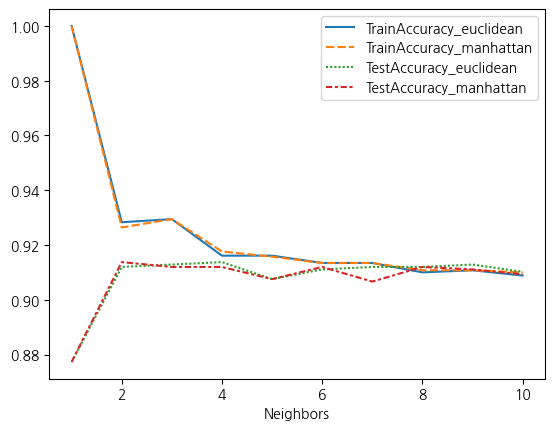

In [123]:
sns.lineplot(data=df_accuracy_metric_pivot)

In [124]:
knn_model= KNeighborsClassifier(n_neighbors=4,metric="euclidean",weights="uniform")
knn_model.fit(df_train_x, df_train_y)
y_pred=knn_model.predict(df_test_x)


print("train data accuracy:{:.3f}".format(knn_model.score(df_train_x,df_train_y)))
print("test data accuracy:{:.3f}\n".format(knn_model.score(df_test_x,df_test_y)))

train data accuracy:0.916
test data accuracy:0.914



In [126]:
print("Confusion matrix:\n{}".format(confusion_matrix(df_test_y,y_pred)))
print(classification_report(df_test_y,y_pred,digits=3))

Confusion matrix:
[[1018    3]
 [  94   10]]
              precision    recall  f1-score   support

           0      0.915     0.997     0.955      1021
           1      0.769     0.096     0.171       104

    accuracy                          0.914      1125
   macro avg      0.842     0.547     0.563      1125
weighted avg      0.902     0.914     0.882      1125



모델의 평가

In [129]:
df_raw = pd.read_csv('/home/piai/바탕화면/2. Big Data 분석/HMEQ.csv')

In [130]:
df_raw['JOB'].fillna("Other",inplace = True)
df_raw.fillna(df_raw.mean(),inplace = True)

In [131]:
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_x = df_raw_dummy.drop('BAD', axis = 1, inplace = False)
df_raw_y = df_raw_dummy['BAD']

In [132]:
df_train_x, df_test_x, df_train_y, df_test_y =  train_test_split(df_raw_x,
                                                                 df_raw_y,
                                                                 test_size = 0.3,
                                                                 random_state = 1234)

GradientBoostingClassifier(random_state=1234)

In [145]:
model = ['DecisionTree', 'RandomForest', 'GradientBoosting', 'NeuralNet']

In [146]:
train_accuracy = []; test_accuracy = []
# 정확도 저장
model_auc=[]
# auc score 저장
model_precision = []; model_recall = []
# f1 score 저장
model_f1_score = []

In [147]:
# 실제 분석에는 random_state를 정하지 않는 것이 일반적이다.

# 모델생성
dt_model=DecisionTreeClassifier(max_depth=6,
                                min_samples_split=20,
                                min_samples_leaf=10,
                                random_state=1234)
dt_model.fit(df_train_x, df_train_y)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=10, min_samples_split=20,
                       random_state=1234)

In [148]:
# train 정확도
train_accuracy.append(dt_model.score(df_train_x, df_train_y))
# test 정확도
test_accuracy.append(dt_model.score(df_test_x, df_test_y))

In [149]:
# 예측값
y_pred = dt_model.predict(df_test_x)

print('Confusion matrix: \n{}'.format(confusion_matrix(df_test_y, y_pred)),'\n')
print(classification_report(df_test_y, y_pred, digits=3))

# roc_curve 예측값
fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)

# auc예측값
model_auc.append(roc_auc)

Confusion matrix: 
[[1013    8]
 [  74   30]] 

              precision    recall  f1-score   support

           0      0.932     0.992     0.961      1021
           1      0.789     0.288     0.423       104

    accuracy                          0.927      1125
   macro avg      0.861     0.640     0.692      1125
weighted avg      0.919     0.927     0.911      1125



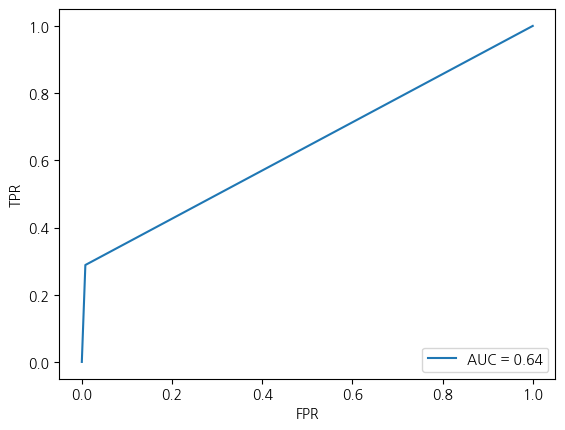

In [150]:
plt.plot(fpr, tpr, label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.ylabel('TPR'); plt.xlabel('FPR')
plt.show()

In [151]:
# precision recall score
model_precision.append(precision_score(df_test_y, y_pred))
model_recall.append(recall_score(df_test_y, y_pred))

# f1 score
model_f1_score.append(f1_score(df_test_y, y_pred))

In [152]:
# 랜덤포레스트
rf_model = RandomForestClassifier(max_depth=6,
                                  n_estimators=100,
                                  min_samples_leaf=20,
                                  random_state=1234)

rf_model.fit(df_train_x, df_train_y)

RandomForestClassifier(max_depth=6, min_samples_leaf=20, random_state=1234)

In [153]:
# train 정확도
train_accuracy.append(rf_model.score(df_train_x, df_train_y))
# test 정확도
test_accuracy.append(rf_model.score(df_test_x, df_test_y))

In [154]:
# 예측값
y_pred = rf_model.predict(df_test_x)

print('Confusion matrix: \n{}'.format(confusion_matrix(df_test_y, y_pred)),'\n')
print(classification_report(df_test_y, y_pred, digits=3))

# roc_curve 예측값
fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)

# auc예측값
model_auc.append(roc_auc)

Confusion matrix: 
[[1021    0]
 [  84   20]] 

              precision    recall  f1-score   support

           0      0.924     1.000     0.960      1021
           1      1.000     0.192     0.323       104

    accuracy                          0.925      1125
   macro avg      0.962     0.596     0.642      1125
weighted avg      0.931     0.925     0.902      1125



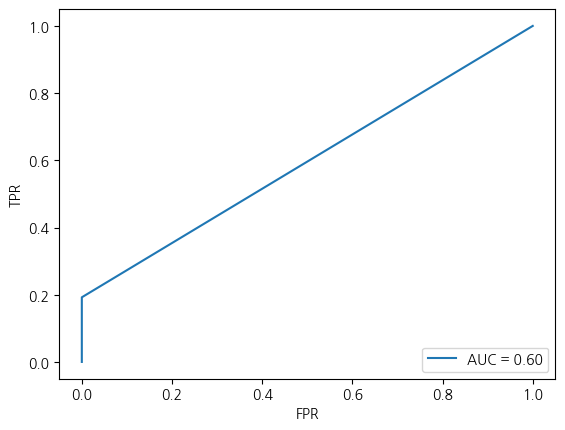

In [155]:
plt.plot(fpr, tpr, label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.ylabel('TPR'); plt.xlabel('FPR')
plt.show()

In [156]:
# precision recall score
model_precision.append(precision_score(df_test_y, y_pred))
model_recall.append(recall_score(df_test_y, y_pred))

# f1 score
model_f1_score.append(f1_score(df_test_y, y_pred))

In [157]:
gb_final = GradientBoostingClassifier(max_depth=6,
                                      n_estimators=100,
                                      min_samples_leaf=15,
                                      learning_rate=0.1,
                                      random_state=1234)
gb_final.fit(df_train_x, df_train_y)

GradientBoostingClassifier(max_depth=6, min_samples_leaf=15, random_state=1234)

In [158]:
# train 정확도
train_accuracy.append(gb_final.score(df_train_x, df_train_y))
# test 정확도
test_accuracy.append(gb_final.score(df_test_x, df_test_y))

In [159]:
# 예측값
y_pred = gb_final.predict(df_test_x)

print('Confusion matrix: \n{}'.format(confusion_matrix(df_test_y, y_pred)),'\n')
print(classification_report(df_test_y, y_pred, digits=3))

# roc_curve 예측값
fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)

# auc예측값
model_auc.append(roc_auc)

Confusion matrix: 
[[1020    1]
 [  56   48]] 

              precision    recall  f1-score   support

           0      0.948     0.999     0.973      1021
           1      0.980     0.462     0.627       104

    accuracy                          0.949      1125
   macro avg      0.964     0.730     0.800      1125
weighted avg      0.951     0.949     0.941      1125



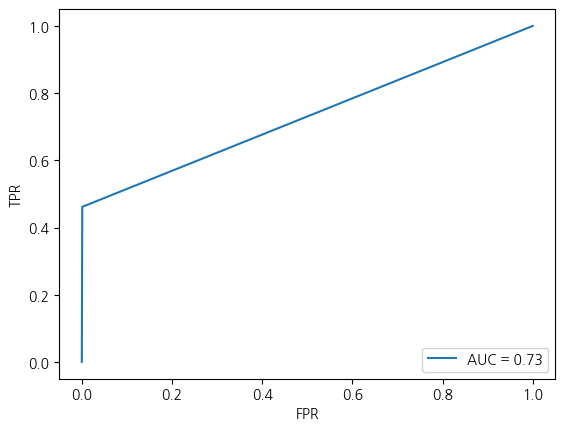

In [160]:
plt.plot(fpr, tpr, label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.ylabel('TPR'); plt.xlabel('FPR')
plt.show()

In [161]:
# precision recall score
model_precision.append(precision_score(df_test_y, y_pred))
model_recall.append(recall_score(df_test_y, y_pred))

# f1 score
model_f1_score.append(f1_score(df_test_y, y_pred))

In [162]:
v_feature_names=df_train_x.columns
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df_raw_x)
df_scaled=pd.DataFrame(df_scaled,columns=v_feature_names)

In [163]:
df_scaled_train_x,df_scaled_test_x=train_test_split(df_scaled,
                                                    test_size=0.3,
                                                    random_state=1234)

In [164]:
nn_model=MLPClassifier(hidden_layer_sizes=(80,80),
                       activation='relu',
                       solver='adam',
                       random_state=1234)

nn_model.fit(df_scaled_train_x,df_train_y)

MLPClassifier(hidden_layer_sizes=(80, 80), random_state=1234)

In [165]:
train_accuracy.append(nn_model.score(df_scaled_train_x,df_train_y))
test_accuracy.append(nn_model.score(df_scaled_test_x,df_test_y))

y_pred=nn_model.predict(df_scaled_test_x)

print('Confusion matrix : \n{}'.format(confusion_matrix(df_test_y,y_pred)),'\n')
print(classification_report(df_test_y,y_pred,digits=3))

fpr,tpr,threshole=roc_curve(df_test_y,y_pred)
roc_auc=auc(fpr,tpr)

model_auc.append(roc_auc)

Confusion matrix : 
[[1018    3]
 [  48   56]] 

              precision    recall  f1-score   support

           0      0.955     0.997     0.976      1021
           1      0.949     0.538     0.687       104

    accuracy                          0.955      1125
   macro avg      0.952     0.768     0.831      1125
weighted avg      0.954     0.955     0.949      1125



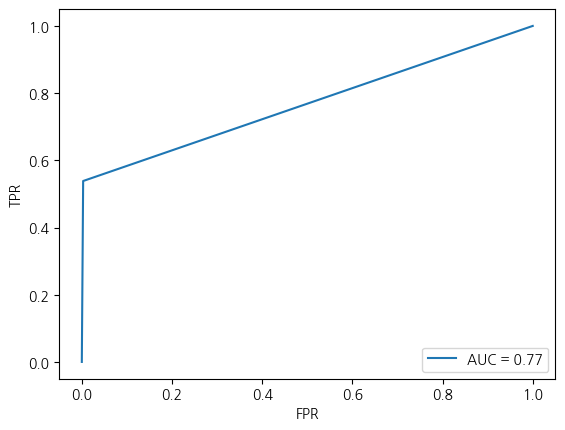

In [166]:
plt.plot(fpr,tpr,label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.ylabel('TPR');plt.xlabel('FPR')
plt.show()

In [167]:
model_precision.append(precision_score(df_test_y,y_pred))
model_recall.append(recall_score(df_test_y,y_pred))

model_f1_score.append(f1_score(df_test_y,y_pred))

In [168]:
df_eval=pd.DataFrame(index=model)
df_eval['TrainAccuracy']=train_accuracy
df_eval['TestAccuracy']=test_accuracy

df_eval['AUC']=model_auc
df_eval['Precision']=model_precision
df_eval['Recall']=model_recall
df_eval['F1Score']=model_f1_score
df_eval.round(3)

,TrainAccuracy,TestAccuracy,AUC,Precision,Recall,F1Score
DecisionTree,0.938,0.927,0.640,0.789,0.288,0.423
RandomForest,0.927,0.925,0.596,1.000,0.192,0.323
GradientBoosting,0.991,0.949,0.730,0.980,0.462,0.627
NeuralNet,1.000,0.955,0.768,0.949,0.538,0.687


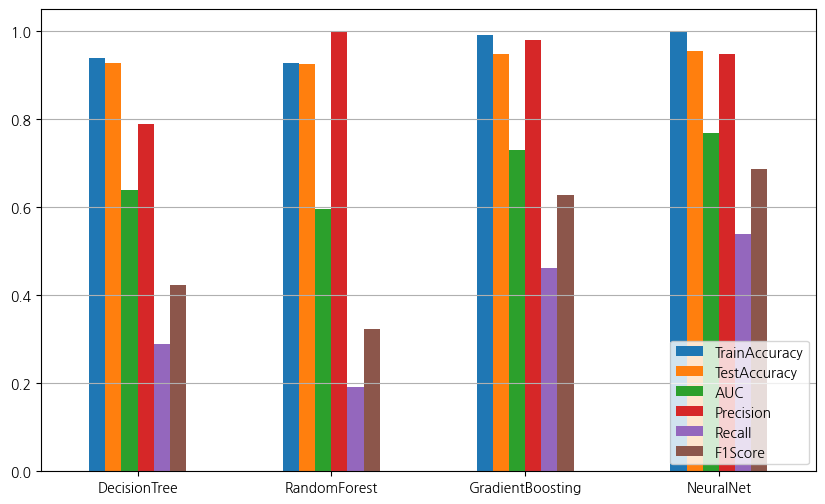

In [169]:
df_eval.plot.bar(rot=0,figsize=(10,6))
plt.legend(loc='lower right')
plt.grid(axis='y')